In [2]:
## using Jacobi
using PyPlot
using DataFrames
using Interact
include("../../HPFEM.jl/src/HPFEM.jl")
include("../src/HPFEM_mod.jl")


lagrange_oed_spec (generic function with 5 methods)

In [3]:
fun(x) = 1./(1 + x.^2)

fun (generic function with 1 method)

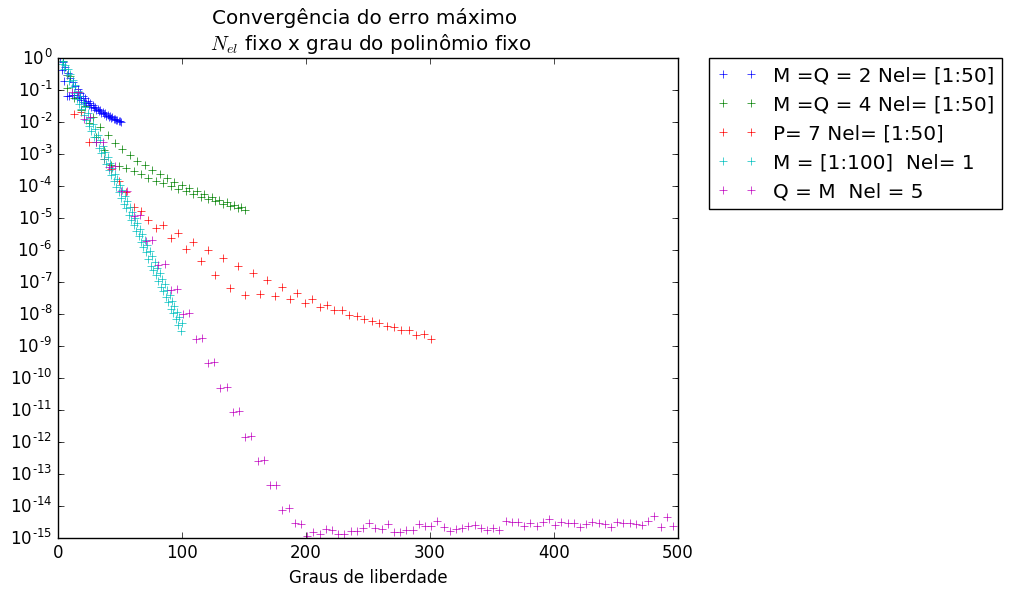

PyObject <matplotlib.text.Text object at 0x7feacc5c3290>

In [32]:

Q_max = M_max = 100
nel_max = 50

idir = []
EMM =DataFrame(erro = Float64[], dof =  Float64[])
EM2 =DataFrame(erro = Float64[], dof =  Float64[])
for M = 3:M_max
    temp = lagrange_aprox_spec(M,M,1,fun,-5,5,idir,101)
    push!(EMM,temp)
    temp = lagrange_aprox_spec(M,M,5,fun,-5,5,idir,101)
    push!(EM2,temp)
end

EMe2 =DataFrame(erro = Float64[], dof =  Float64[])
EMe3 =DataFrame(erro = Float64[], dof =  Float64[])
EMe = DataFrame(erro = Float64[], dof =  Float64[])
for nel = 1:nel_max
    temp = lagrange_aprox_spec(4,4,nel,fun,-5,5,idir,101)
    push!(EMe,temp)

    temp = lagrange_aprox_spec(2,2,nel,fun,-5,5,idir,101)
    push!(EMe2,temp)

    temp = lagrange_aprox_spec(7,7,nel,fun,-5,5,idir,101)
    push!(EMe3,temp)
end  

semilogy(EMe2[:dof],EMe2[:erro],"+",label = "M =Q = 2 Nel= [1:$nel_max]")
semilogy(EMe[:dof],EMe[:erro],"+",label = "M =Q = 4 Nel= [1:$nel_max]")
semilogy(EMe3[:dof],EMe3[:erro],"+",label = "P= 7 Nel= [1:$nel_max]")
semilogy(EMM[:dof],EMM[:erro],"+",label = "M = [1:$M_max]  Nel= 1")
semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Graus de liberdade")
title("Convergência do erro máximo \n \$N_{el}\$ fixo x grau do polinômio fixo")

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"Q",50,1:1:100,true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"M",50,1:1:100,true)

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"nel",25,1:1:50,true)

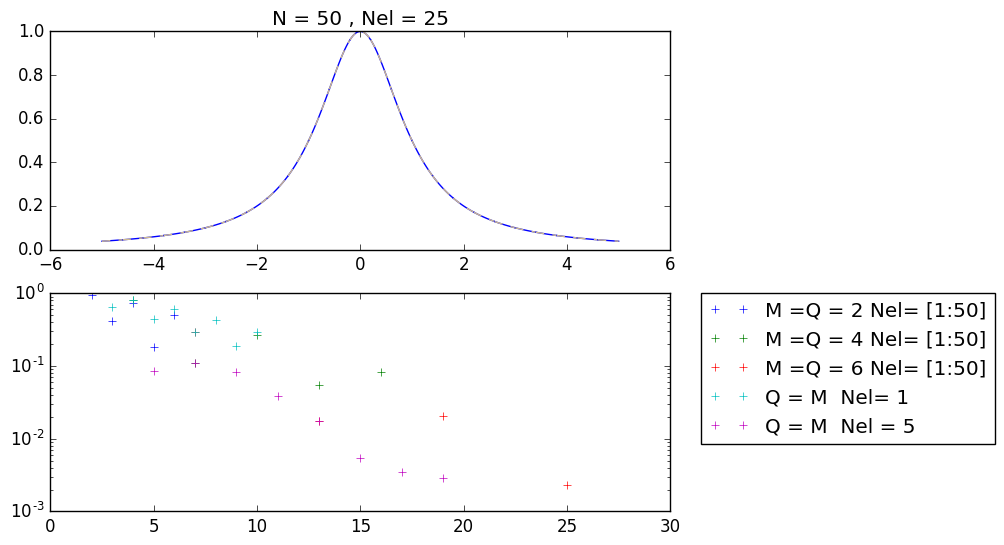

In [30]:
l = figure(2)
Q_max = M_max = 100
nel_max = 50
@manipulate for Q= 1:1:Q_max,M=1:1:M_max, nel=1:1:nel_max; withfig(l) do
        idir= []
        if Q < M
            Q=M
        end        
        lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)
        subplot(211)
        erro = lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)
        dof = lagrange_aprox_spec(M,Q,nel,fun,-5,5,idir,101)
        

        subplot(212)
        
        semilogy(EMe2[:dof],EMe2[:erro],"+",label = "M =Q = 2 Nel= [1:$nel_max]")
        semilogy(EMe[:dof],EMe[:erro],"+",label = "M =Q = 4 Nel= [1:$nel_max]")
        semilogy(EMe3[:dof],EMe3[:erro],"+",label = "M =Q = 6 Nel= [1:$nel_max]")
        semilogy(EMM[:dof],EMM[:erro],"+",label = "Q = M  Nel= 1")
        semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")
        xlim(0,30)
        ylim(1e-3,1)
        PyPlot.axhline(dof[1])
        PyPlot.axvline(dof[2])
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    end
end



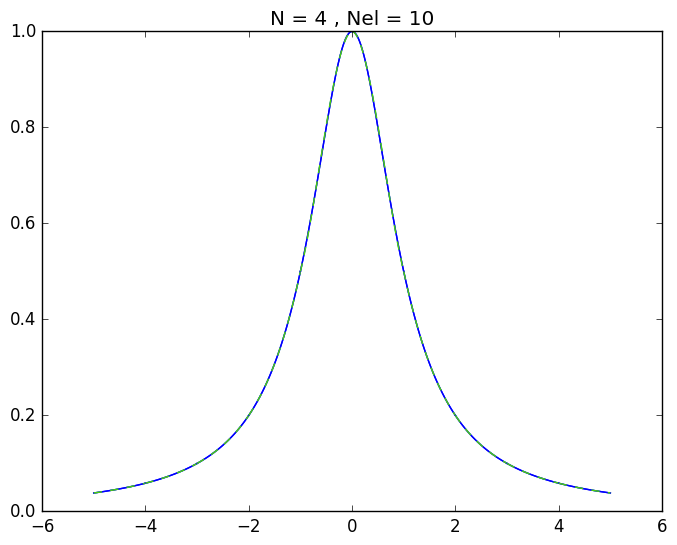

1x2 Array{Float64,2}:
 0.00337513  31.0

In [7]:
M = 4
Q = M
nel = 10
idir= []
if Q < M
    Q=M
end        
lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)

erro = lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)
dof = lagrange_aprox_spec(M,Q,nel,fun,-5,5,idir,101)




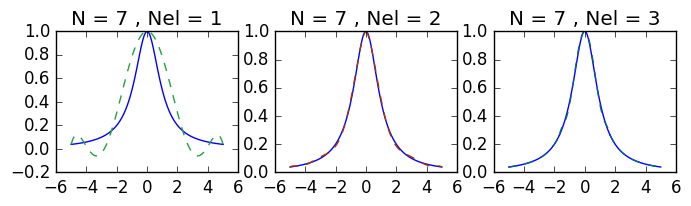

1x2 Array{Float64,2}:
 0.020443  19.0

In [33]:
M = 7
Q = M
idir = []
subplot(331)
nel = 1
lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)

subplot(332)
nel = 2
lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)

subplot(333)
nel = 3
lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)


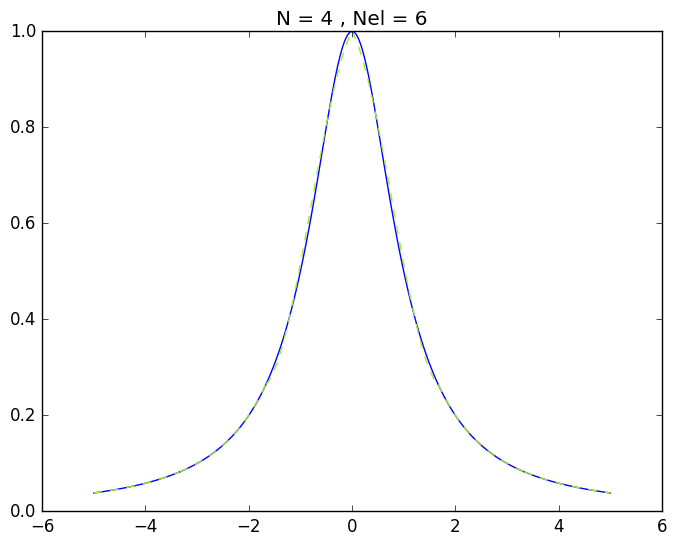

1x2 Array{Float64,2}:
 0.0220789  19.0

In [9]:
lagrange_aprox_plot(M,M,nel,fun,-5,5,idir,101)

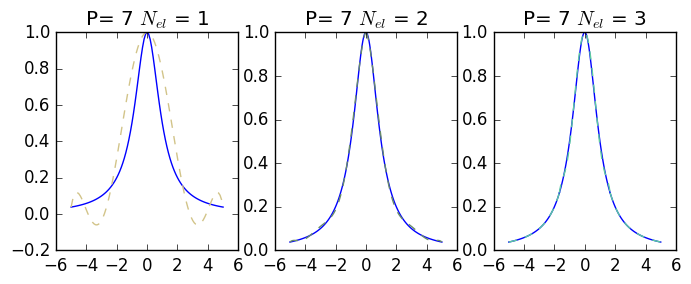

PyObject <matplotlib.text.Text object at 0x7feaceaa2750>

In [10]:
M = 7
Q = M
idir = []
subplot(231)
nel = 1
lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)
title("P= $M \$N_{el}\$ = $nel")
subplot(232)
nel = 2
lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)
title("P= $M \$N_{el}\$ = $nel")

subplot(233)
nel = 3
lagrange_aprox_plot(M,Q,nel,fun,-5,5,idir,101)
title("P= $M \$N_{el}\$ = $nel")


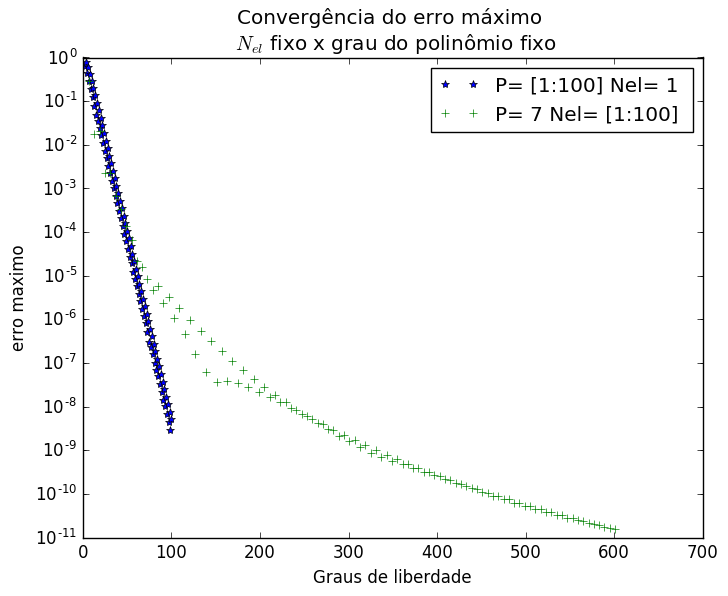

PyObject <matplotlib.text.Text object at 0x7feacaf06390>

In [54]:

Q_max = M_max = 100
nel_max = 100

idir = []
EMM =DataFrame(erro = Float64[], dof =  Float64[])

for M = 3:M_max
    temp = lagrange_aprox_spec(M,M,1,fun,-5,5,idir,101)
    push!(EMM,temp)
end
EMe = DataFrame(erro = Float64[], dof =  Float64[])
for nel = 1:nel_max
    temp = lagrange_aprox_spec(7,7,nel,fun,-5,5,idir,101)
    push!(EMe,temp)
end  
semilogy(EMM[:dof],EMM[:erro],"*",label = "P= [1:$M_max] Nel= 1")
semilogy(EMe[:dof],EMe[:erro],"+",label = "P= 7 Nel= [1:$nel_max] ")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend()
xlabel("Graus de liberdade")
ylabel("erro maximo")
title("Convergência do erro máximo \n \$N_{el}\$ fixo x grau do polinômio fixo")


In [44]:
using Formatting

In [50]:
fmt = "%10.3e"
erroMM = [sprintf1( fmt, erro ) for erro in EMM[:erro]]
erroMe = [sprintf1( fmt, erro ) for erro in EMe[:erro]]
dfMM = DataFrame()
dfMM[:erro] = erroMM
dfMM[:Grausdeliberdade] = EMM[:dof]
dfMe

dfMe = DataFrame()
dfMe[:erro] = erroMe
dfMe[:Grausdeliberdade] = EMe[:dof]
dfMe

writetable("dfMe.csv",dfMe,separator = ',',header=true)
writetable("dfMM.csv",dfMM,separator = ',',header=true)

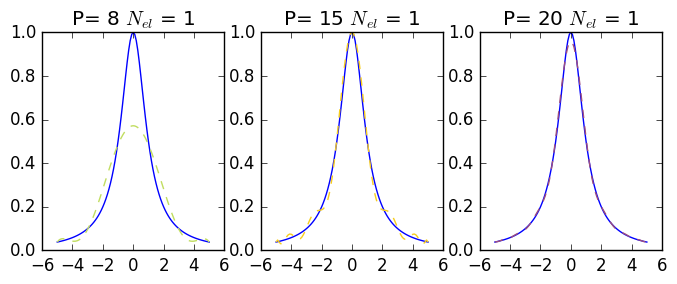

PyObject <matplotlib.text.Text object at 0x7feacebebad0>

In [11]:
M = 7
Q = M+2
idir = []
subplot(231)
nel = 1
M = 8
Q = M+2
lagrange_aprox_plot(M,M,nel,fun,-5,5,idir,101)
title("P= $M \$N_{el}\$ = $nel")
subplot(232)
M = 15
Q = M+2
nel = 1
lagrange_aprox_plot(M,M,nel,fun,-5,5,idir,101)
title("P= $M \$N_{el}\$ = $nel")

subplot(233)
M = 20
Q = M+2
nel = 1
lagrange_aprox_plot(M,M,nel,fun,-5,5,idir,101)
title("P= $M \$N_{el}\$ = $nel")


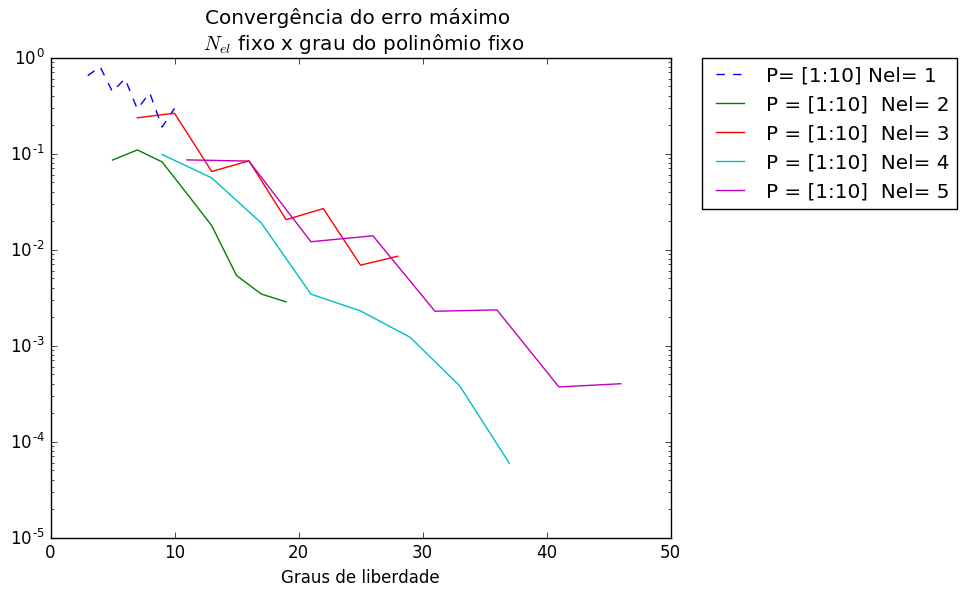

PyObject <matplotlib.text.Text object at 0x7feacdc4ead0>

In [29]:

Q_max = M_max = 10
nel_max = 5

idir = []
EMM =DataFrame(erro = Float64[], dof =  Float64[])
EM2 =DataFrame(erro = Float64[], dof =  Float64[])
EM3 =DataFrame(erro = Float64[], dof =  Float64[])
EM4 =DataFrame(erro = Float64[], dof =  Float64[])
EM5 =DataFrame(erro = Float64[], dof =  Float64[])
for M = 3:M_max
    temp = lagrange_aprox_spec(M,M,1,fun,-5,5,idir,101)
    push!(EMM,temp)
    temp = lagrange_aprox_spec(M,M,2,fun,-5,5,idir,101)
    push!(EM2,temp)
    temp = lagrange_aprox_spec(M,M,3,fun,-5,5,idir,101)
    push!(EM3,temp)
    temp = lagrange_aprox_spec(M,M,4,fun,-5,5,idir,101)
    push!(EM4,temp)
    temp = lagrange_aprox_spec(M,M,5,fun,-5,5,idir,101)
    push!(EM5,temp)
end

semilogy(EMM[:dof],EMM[:erro],"--",label = "P= [1:$M_max] Nel= 1")
semilogy(EM2[:dof],EM2[:erro],"-",label = "P = [1:$M_max]  Nel= 2")
semilogy(EM3[:dof],EM3[:erro],"-",label = "P = [1:$M_max]  Nel= 3")
semilogy(EM4[:dof],EM4[:erro],"-",label = "P = [1:$M_max]  Nel= 4")
semilogy(EM5[:dof],EM5[:erro],"-",label = "P = [1:$M_max]  Nel= 5")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Graus de liberdade")
title("Convergência do erro máximo \n \$N_{el}\$ fixo x grau do polinômio fixo")